#### (a) Find the Hessian $H$ of the emperical loss, and show $H \succeq 0$

From the problem set, we konw that:

\begin{align*}
J(\theta) &= \frac{1}{m} \sum_{i=1}^{m} \mathrm{log}\big(1 + e ^{-y^{(i)} \theta^T x^{(i)}}\big) \\
               &= - \frac{1}{m} \sum_{i=1}^{m} \mathrm{log}\big(h_\theta(y^{(i)}x^{(i)})\big)
\end{align*}

Thus, we can have the following:

\begin{align*}
\frac{\partial J}{\partial \theta_j} 
 &= -\frac{1}{m} \sum_{i=1}^{m} \frac{1}{h_\theta(y^{(i)}x^{(i)})} \frac{\partial h_\theta(y^{(i)}x^{(i)})}{\partial \theta_j}   \\
 &= -\frac{1}{m} \sum_{i=1}^{m} \frac{1}{h_\theta(y^{(i)}x^{(i)})} h_\theta(y^{(i)}x^{(i)}) (1 - h_\theta(y^{(i)}x^{(i)})) \frac{\partial y^{(i)}x^{(i)}}{\partial \theta_j}  \\
 &= -\frac{1}{m} \sum_{i=1}^{m} \big(1 - h_\theta(y^{(i)}x^{(i)}) \big) y^{(i)} x_j^{(i)}  \\
\end{align*}

\begin{align*}
H_{jk} = \frac{\partial J}{\partial \theta_j \partial \theta_k} 
&= -\frac{1}{m} \sum_{i=1}^{m} \frac{\partial (1-h_\theta(y^{(i)}x^{(i)}))}{\partial \theta_k} y^{(i)} x_j^{(i)} \\
&= \frac{1}{m} \sum_{i=1}^{m} y^{(i)}x_j^{(i)}h_\theta(y^{(i)}x^{(i)}) (1 - h_\theta(y^{(i)}x^{(i)})) \frac{\partial y^{(i)}x^{(i)}}{\partial \theta_k} \\
&= \frac{1}{m} \sum_{i=1}^{m} x_j^{(i)}x_k^{(i)}h_\theta(y^{(i)}x^{(i)}) (1 - h_\theta(y^{(i)}x^{(i)}))  \\
\end{align*}

Thus, we can have:

\begin{align*}
z^THz &= \sum_{j=1}^{n} \sum_{k=1}^{n} z_j H_{jk} z_k \\
&= \sum_{j=1}^{n} \sum_{k=1}^{n} \big[z_j \frac{1}{m} \sum_{i=1}^{m} x_j^{(i)}x_k^{(i)}h_\theta(y^{(i)}x^{(i)}) (1 - h_\theta(y^{(i)}x^{(i)})) \big] z_j \\
&= \frac{1}{m} \sum_{i=1}^{m} h_\theta(y^{(i)}x^{(i)}) (1 - h_\theta(y^{(i)}x^{(i)})) \sum_{j=1}^{n} \sum_{k=1}^{n} z_j x_j^{(i)} x_k^{(i)} z_k
\end{align*}

We also know that $1 > h_\theta(y^{(i)}x^{(i)}) > 0$ and $\sum_{j=1}^{n} \sum_{k=1}^{n} z_j x_j^{(i)} x_k^{(i)} z_j = ((x^{(i)})^T z)^2 \ge 0$, 

so $z^T H z \ge 0$, so $H$ is PSD, i.e. $H \succeq 0$, $H$ is positive semidefinte.

#### (b) Implement Newton's Method for Optimizing $J(\theta)$

\begin{align*}
\theta &:= \theta - \frac{\partial J(\theta) / \partial \theta} {H} \\
       &:= \theta - \frac{\nabla_{\theta} J(\theta)} {H} \\
       &:= \theta - H^{-1} \nabla_{\theta} J(\theta)
\end{align*}

\begin{align*}
\frac{\partial J}{\partial \theta_j} 
 &= -\frac{1}{m} \sum_{i=1}^{m} \big(1 - h_\theta(y^{(i)}x^{(i)}) \big) y^{(i)} x_j^{(i)}  \\
\end{align*}

\begin{align*}
H_{jk} = \frac{\partial J}{\partial \theta_j \partial \theta_k} 
&= \frac{1}{m} \sum_{i=1}^{m} x_j^{(i)}x_k^{(i)}h_\theta(y^{(i)}x^{(i)}) (1 - h_\theta(y^{(i)}x^{(i)}))  \\
\end{align*}

In [1]:
# newton's method
# our following code refer "zyxue/cs229" at github!!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df_X = pd.read_csv('logistic_x.txt', sep='\ +', header=None, engine='python')
ys = pd.read_csv('logistic_y.txt', sep='\ +', header=None, engine='python')
ys = ys.astype(int)

In [4]:
df_X['label'] = ys[0].values

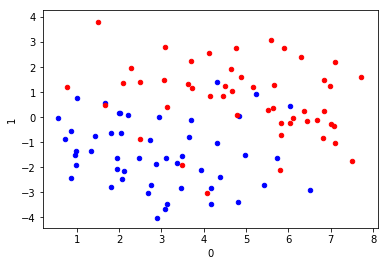

In [5]:
# we first look at the data
ax = plt.axes() # show on the same figure window

df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

In [6]:
Xs = df_X[[0, 1]].values
# Xs.shape # figure out its shape

In [7]:
# adding the intercept terms
# get X and label y
Xs = np.hstack([np.ones((Xs.shape[0], 1)), Xs])
ys = df_X['label'].values

In [8]:
Xs.shape

(99, 3)

In [9]:

all_thetas = [] # store intermediate result 
theta = np.zeros(Xs.shape[1])
tol = 1e9
n_iters = 0
while tol > 1e-6:
    zs = ys * Xs.dot(theta) #99x1
    gzs = 1 / (1 + np.exp(-zs))
    nabla = np.mean((gzs - 1) * ys * Xs.T, axis=1)
    
    # an efficient way of calculating hessian
    # as Hessian matrix using gradient first, so this segment is within while loop
    hessian = np.zeros((Xs.shape[1], Xs.shape[1]))
    for i in range(hessian.shape[0]):
        for j in range(hessian.shape[0]):
            if i <= j:
                hessian[i][j] = np.mean(gzs * (1 - gzs) * Xs[:,i] * Xs[:,j])
                if i != j:
                    hessian[j][i] = hessian[i][j]
            
    delta = np.linalg.inv(hessian).dot(nabla)
    old_theta = theta.copy()
    theta -= delta
    all_thetas.append(theta.copy())
    n_iters += 1
    tol = np.sum((theta - old_theta)**2)
print('converged after {0} iterations'.format(n_iters))

converged after 6 iterations


**Attention:** It seems that Newton's Method converges more quickly.

#### (c) plot the training data and decision boundary

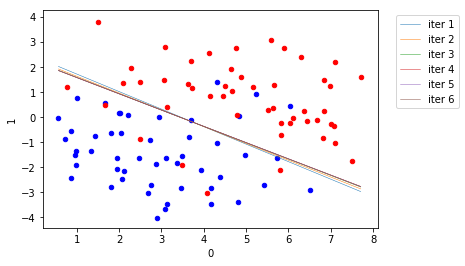

In [10]:
ax = plt.axes()

df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

_xs = np.array([np.min(Xs[:,1]), np.max(Xs[:,1])])
for k, theta in enumerate(all_thetas):
    _ys = (theta[0] + theta[1] * _xs) / (- theta[2])
    plt.plot(_xs, _ys, label='iter {0}'.format(k + 1), lw=0.5)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")